In [260]:
import pandas as pd

In [261]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Project\Health Insurance Cost Prediction Using ML\insurance (1).csv")

### 1. Display Top 5 Rows of The Dataset

In [262]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Check Last 5 Rows of The Dataset

In [263]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [264]:
data.shape

(1338, 7)

In [265]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5.Check Null Values In The Dataset

In [267]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [268]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values 

In [269]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [270]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [271]:
X = data.drop(['charges'],axis=1)
y = data['charges']

### 9. Train/Test split
#### 1. Split data into two part : a training set and a testing set
#### 2. Train the model(s) on training set
#### 3. Test the Model(s) on Testing set

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 10. Import the models

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### 11. Model Training

In [296]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

### 12. Prediction on Test Data

In [297]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3})
df2=df1.head(10)

In [298]:
df1

,Actual,Lr,svm,rf
764,9095.06825,8924.407244,9548.261584,12261.762447
887,5272.17580,7116.295018,9492.515425,5148.876016
890,29330.98315,36909.013521,9648.758701,28177.391561
1293,9301.89355,9507.874691,9555.044136,9711.620378
259,33750.29180,27013.350008,9420.421978,34513.508414
...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46806.430016
575,12222.89830,11814.555568,9625.431547,13198.188209
535,6067.12675,7638.107736,9504.168517,6430.995431
543,63770.42801,40959.081722,9605.004594,46892.586258


### 13. Compare Performance Visually 

In [299]:
import matplotlib.pyplot as plt

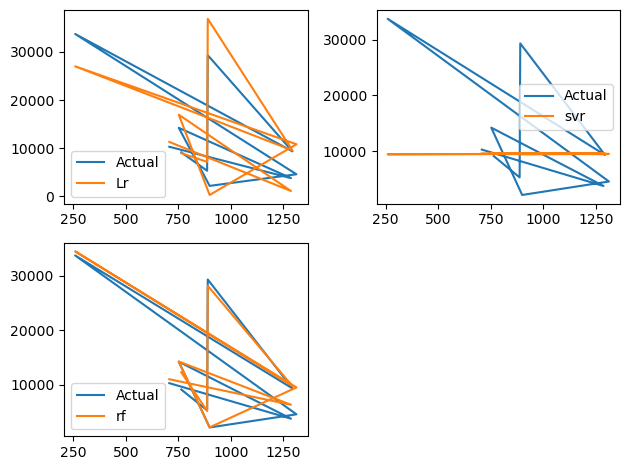

In [300]:
plt.subplot(221)
plt.plot(df2['Actual'],label='Actual')
plt.plot(df2['Lr'],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df2['Actual'],label='Actual')
plt.plot(df2['svm'],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'],label='Actual')
plt.plot(df2['rf'],label="rf")
plt.legend()

plt.tight_layout()

plt.legend()

### 14. Evaluating the Algorithm

In [301]:
from sklearn import metrics

In [302]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)

In [303]:
print(score1,score2,score3)

0.7833463107364539 -0.07229762787861826 0.86543467184655


In [304]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)

In [305]:
print(s1,s2,s3)

4186.508898366433 8592.428727899724 2479.595365541947


### 15. Predict Charges For New Customer

In [290]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [291]:
df = pd.DataFrame(data,index=[8])
df

,age,sex,bmi,children,smoker,region
8,40,1,40.3,4,1,2


In [293]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43003.30824470001


### From above we found that RandomForestRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [306]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

### Predict Charges For New Customer

In [310]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43037.260516999995
